## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

import yfinance as yf
import seaborn as sns



## Load and Convert DataSet

In [2]:
tck = yf.Ticker("INTC")
start_Data = "1995-08-1"

df = tck.history(start = start_Data, end = None)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-08-01 00:00:00-04:00,4.579952,4.579952,4.403800,4.456646,94556800,0.0,0.0
1995-08-02 00:00:00-04:00,4.535916,4.579954,4.298111,4.333341,135620800,0.0,0.0
1995-08-03 00:00:00-04:00,4.210032,4.421415,4.165994,4.377377,117961600,0.0,0.0
1995-08-04 00:00:00-04:00,4.386184,4.439029,4.350953,4.368568,68723200,0.0,0.0
1995-08-07 00:00:00-04:00,4.403800,4.500683,4.386184,4.474260,51580000,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-28 00:00:00-04:00,20.820000,21.290001,20.650000,20.680000,86105600,0.0,0.0
2025-07-29 00:00:00-04:00,20.690001,20.850000,20.340000,20.410000,100831500,0.0,0.0
2025-07-30 00:00:00-04:00,20.430000,20.620001,20.080000,20.340000,67420300,0.0,0.0


In [3]:
col_close = df.pop("Close")
df.insert(0, "Close", col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-08-01 00:00:00-04:00,4.456646,4.579952,4.579952,4.403800,94556800,0.0,0.0
1995-08-02 00:00:00-04:00,4.333341,4.535916,4.579954,4.298111,135620800,0.0,0.0
1995-08-03 00:00:00-04:00,4.377377,4.210032,4.421415,4.165994,117961600,0.0,0.0
1995-08-04 00:00:00-04:00,4.368568,4.386184,4.439029,4.350953,68723200,0.0,0.0
1995-08-07 00:00:00-04:00,4.474260,4.403800,4.500683,4.386184,51580000,0.0,0.0


In [4]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
columns = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]

In [6]:
def check_df(df: object, head: object=5) -> object:
    print("\nShape of data frame")
    print(df.shape)
    print("\nTypes of data frame")
    print(df.dtypes)
    print("\nNaN values")
    print(df.isnull().sum())
    print("\nInfomation of data frame")
    print(df.info())

check_df(df)


Shape of data frame
(7551, 7)

Types of data frame
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NaN values
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Infomation of data frame
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7551 entries, 1995-08-01 00:00:00-04:00 to 2025-08-01 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         7551 non-null   float64
 1   Open          7551 non-null   float64
 2   High          7551 non-null   float64
 3   Low           7551 non-null   float64
 4   Volume        7551 non-null   int64  
 5   Dividends     7551 non-null   float64
 6   Stock Splits  7551 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 471.9

In [7]:
df["Volume"] = df["Volume"].astype("float64")

In [8]:
#Check the duplicated row
print("Number of duplicated rows: ", len(df[df.duplicated()]))

Number of duplicated rows:  0


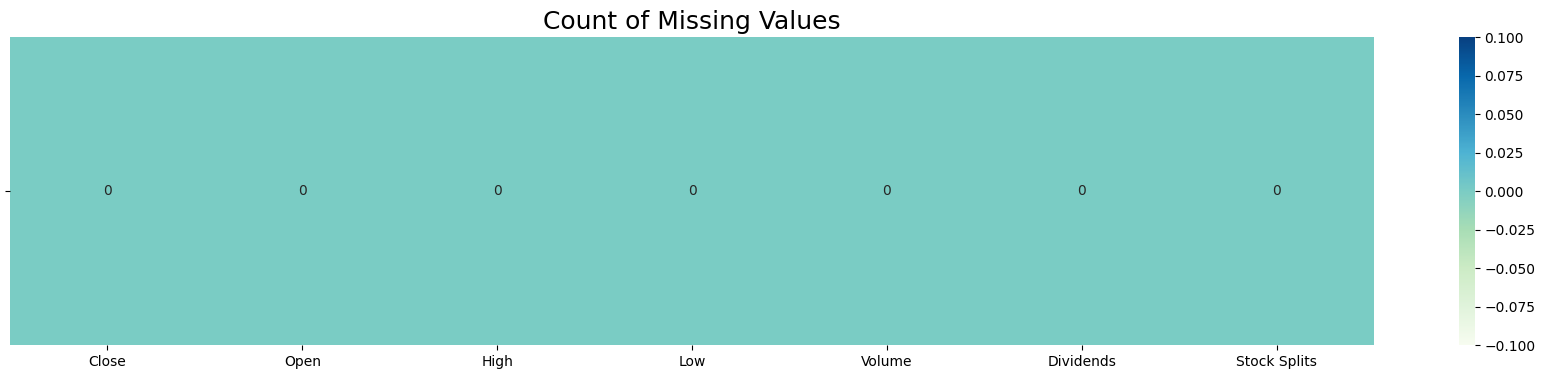

In [9]:
# Count the missing values by columns
plt.figure(figsize = (22, 4))
sns.heatmap((df.isna().sum()).to_frame(name='').T, cmap="GnBu", annot=True, fmt='0.0f').set_title("Count of Missing Values", fontsize = 18)
plt.show()


Không có sự trùng lặp dữ liệu và dữ liệu NaN

##### Bảng thông tin thống kê dữ liệu.

In [10]:
df.describe().T.style.background_gradient(cmap="BuGn", axis=1)

,count,mean,std,min,25%,50%,75%,max
Close,7551.000000,22.418300,12.848665,3.525117,13.046336,17.585260,29.358293,62.083347
Open,7551.000000,22.419083,12.845417,3.577996,13.068531,17.583755,29.372653,62.028760
High,7551.000000,22.720441,12.998605,3.639682,13.217903,17.801670,29.638943,62.292520
Low,7551.000000,22.119990,12.696241,3.511898,12.916717,17.365328,29.101333,60.600837
Volume,7551.000000,51977040.683353,30777120.664001,1155400.000000,30426050.000000,47224400.000000,65218550.000000,546630400.000000
Dividends,7551.000000,0.002358,0.023918,0.000000,0.000000,0.000000,0.000000,0.365000
Stock Splits,7551.000000,0.000795,0.039859,0.000000,0.000000,0.000000,0.000000,2.000000


In [11]:
# Tim du lieu duy nhat
df.apply(lambda x: len(x.unique()))

Close           6940
Open            7493
High            7492
Low             7501
Volume          7527
Dividends         26
Stock Splits       2
dtype: int64

## Analysis of Correlations

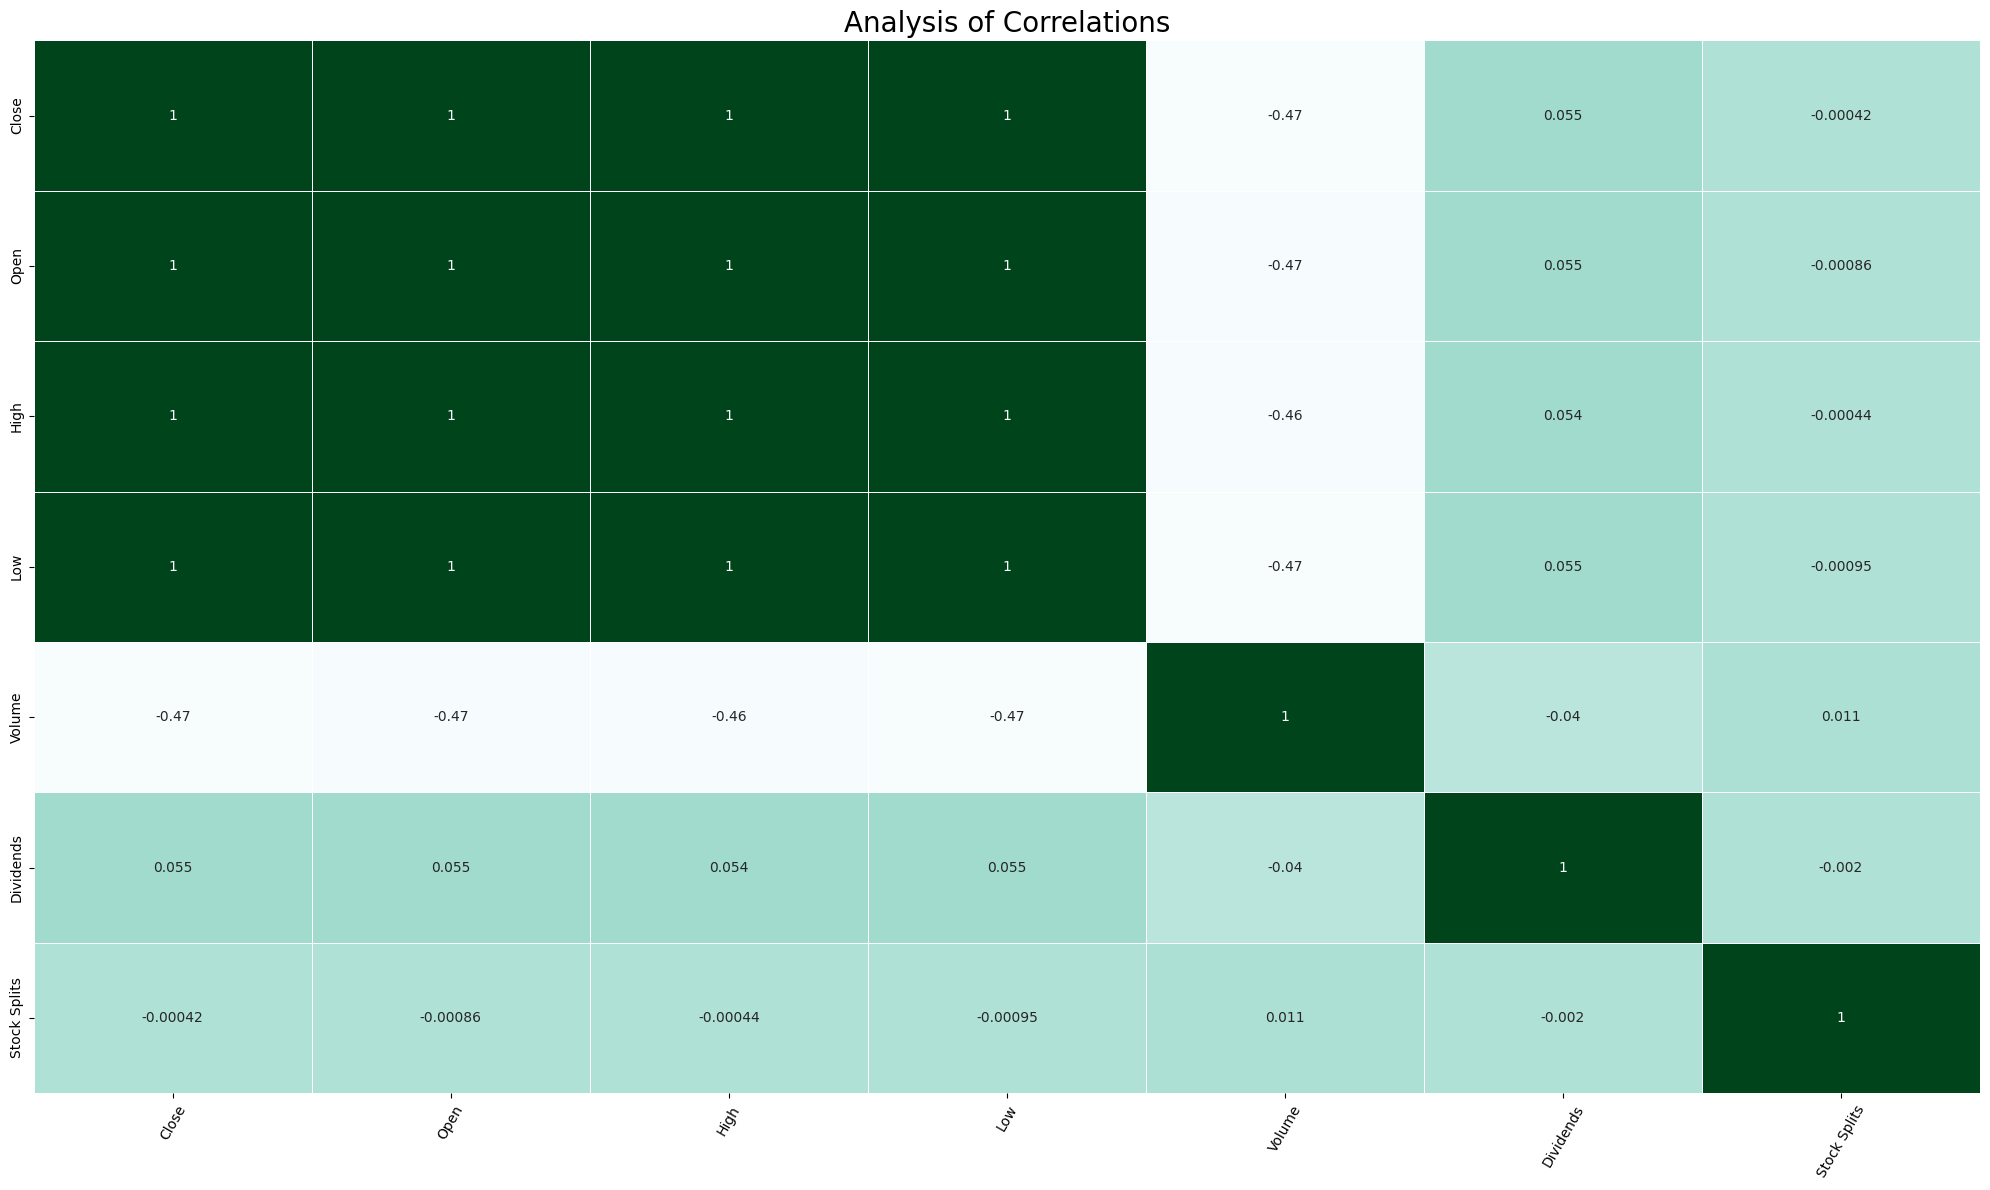

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="BuGn", annot=True, linewidths=.6, cbar=False)
plt.xticks(rotation = 60, size = 10)
plt.yticks(size=10)
plt.title("Analysis of Correlations", size=20)
plt.tight_layout()
plt.show()

- Tính tương quan giữa các biến giá cổ phiếu (Close, Open, High, Low):
    * Các mối quan hệ tương quan giữa 4 giá trị cổ phiếu này có giá trị bằng 1. Thể hiện một mối tương quan hoàn hảo và tích cực giữa chúng.
    * Các giá cổ phiếu có xu hướng hoạt động cùng chiều một cách chặt chẽ. Điều này được xác định một cách chính xác vì các mức giá này đều được mở bán trong cùng một thời gian giao dịch.
- Tính tương quan giữa các biến (Close, Open, High, Low) với các biến (Volume, Dividends, Stock Splits):
    * Với Volume: Các giá trị tương quan đều là -0.47~-0.46. Đây là tính tương quan tiêu cực và yếu. Điều này cho thấy có mối liên hệ yếu, khi giá tăng, khối lượng giao dịch có xu hướng giảm một chút, và ngược lại (Mối quan hệ này không mạnh).
    * Với Dividends: Các gia trị tương quan đều nằm ở mức 0.054. Đây là mức tương quan tích cực và rắt yếu. Mối quan hệ này không có mức ảnh hưởng nhiều đến giá cổ phiếu, cho thấy việc chi trả cổ tức không có mối liên hệ chặt chẽ với sự biến động của giá cổ phiếu.
    * Với Stock Splits: Các giá trị tương quan đều nằm trong mức 0.041~0.042. Đây là mối quan hệ tương quan tiêu cực và cực kỳ yếu. Việc chia tách cổ phiếu gần như không có mối quan hệ tương quan tuyến tính với sự biến động giá.
- Sự tương quan giữa các biến còn lại (Volume, Dividends, Stock Splits):
    * Các giá trị Volume, Dividends, Stock Splits không có mối tương quan liên hệ với nhau nên các giá trị tương quan tiêu cực và cực kỳ yếu.
    * Các ô trên đường chéo chính có giá trị tương quan mạnh mẽ vì một biến luôn tương quan mạnh mẽ với chính nó.

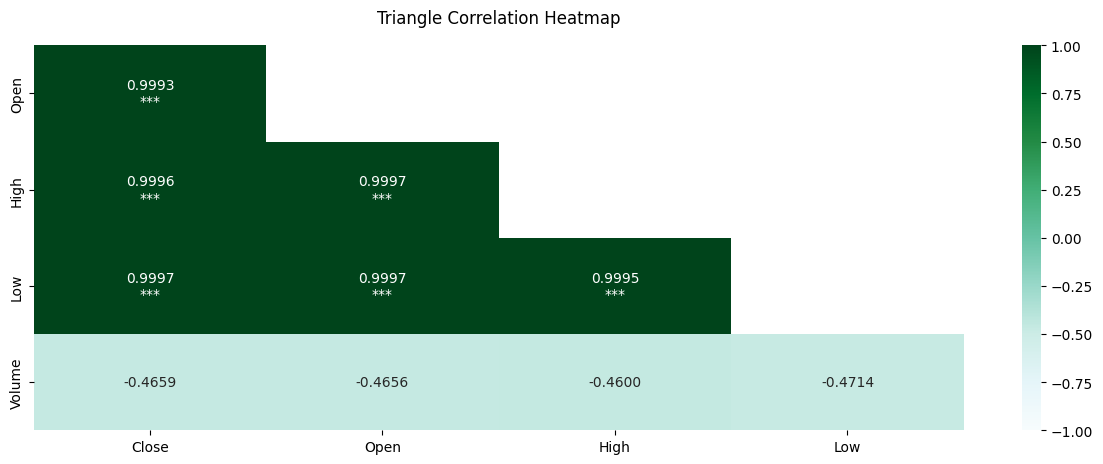

In [13]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (15,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin = -1, vmax=1, annot=annot, fmt='', cmap="BuGn")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 12}, pad = 16)
plt.show()

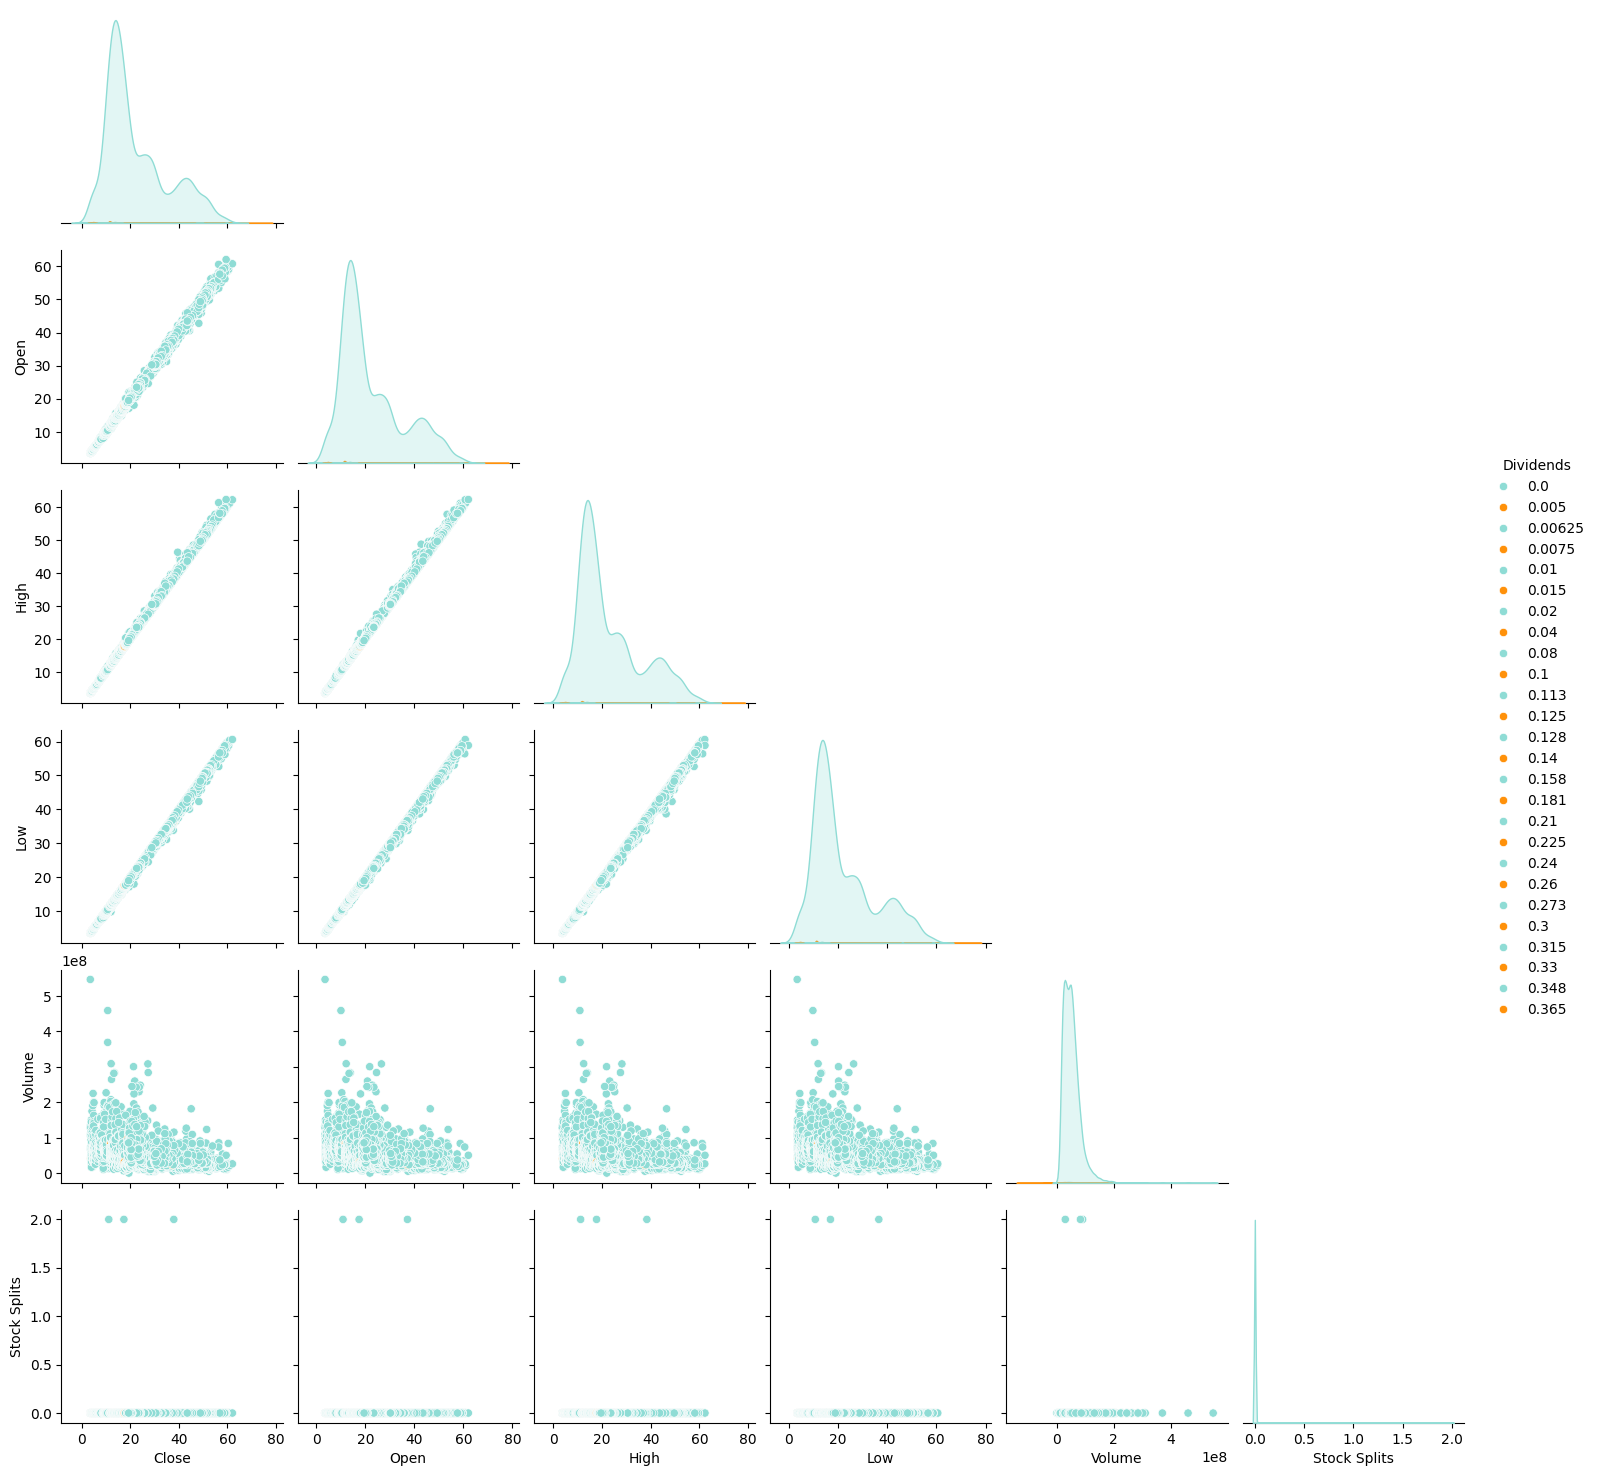

In [14]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(["#8FDCD5", "#FF910A"])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette, corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

## Distributions of prices

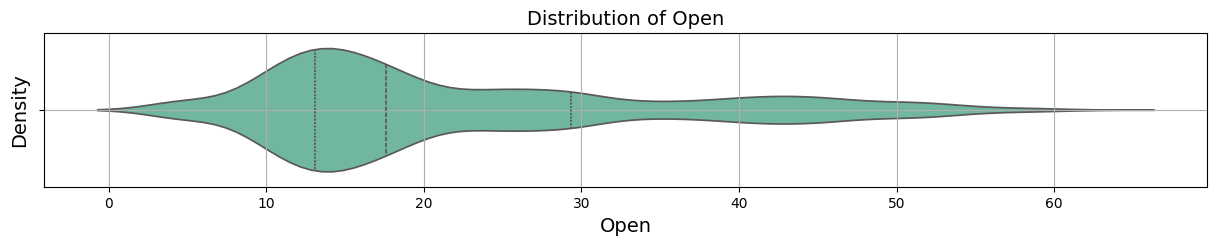

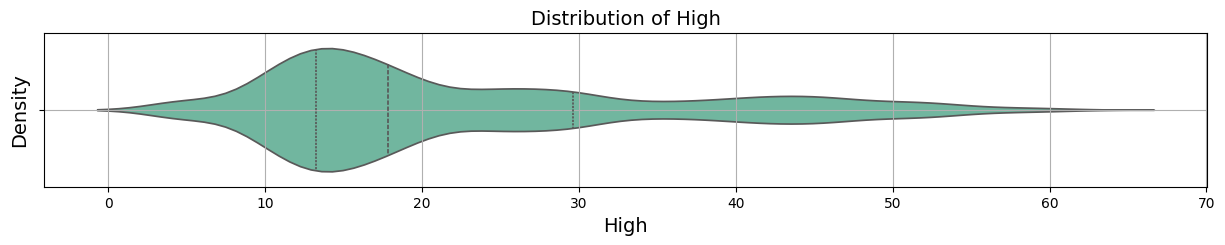

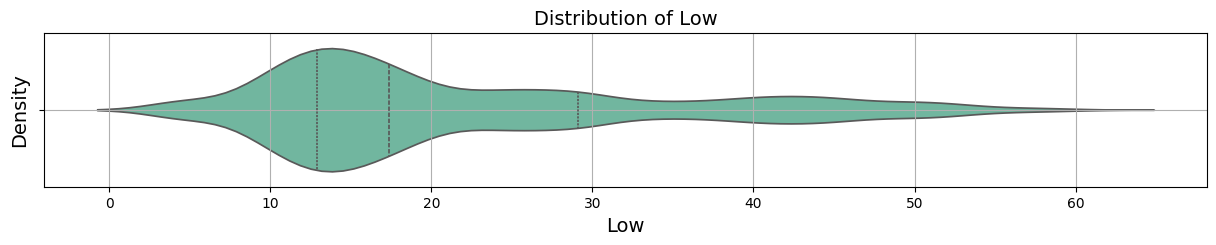

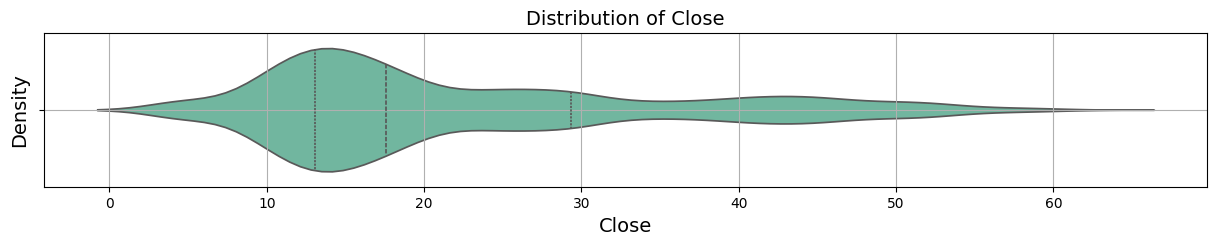

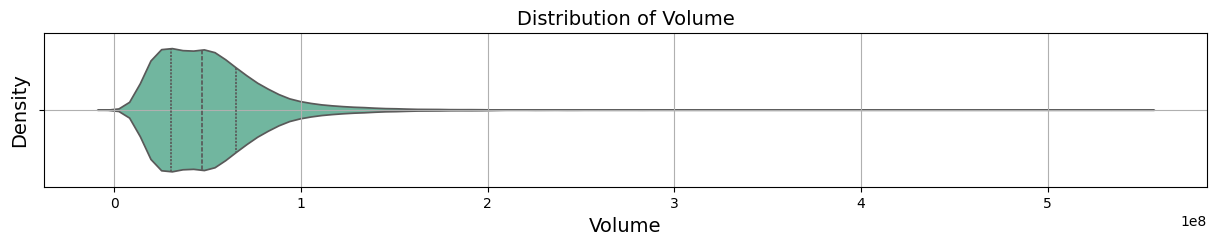

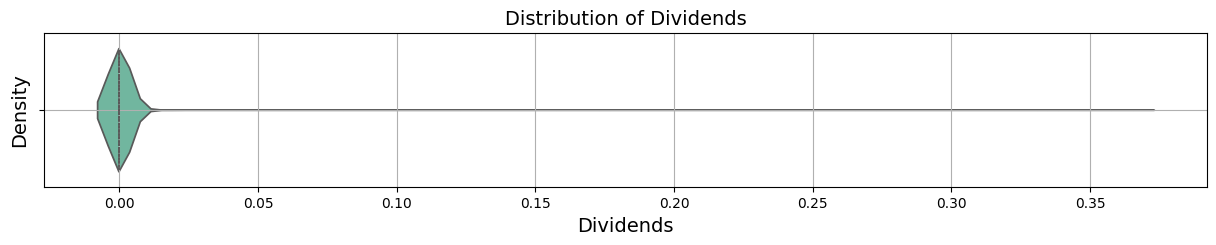

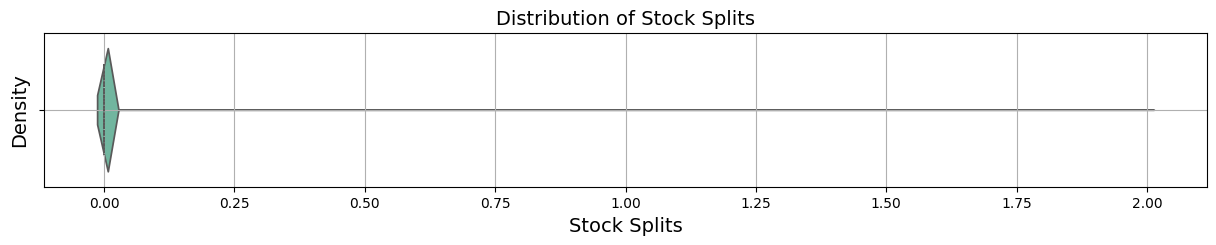

In [15]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.violinplot(x=df[column], palette=palette, inner="quartitle")
    plt.title(f"Distribution of {column}", fontsize = 14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(True)
    plt.show()

## Boxplot Distribution of Prices

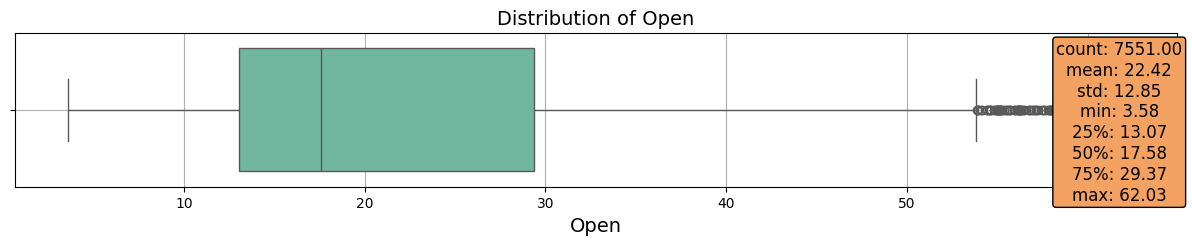

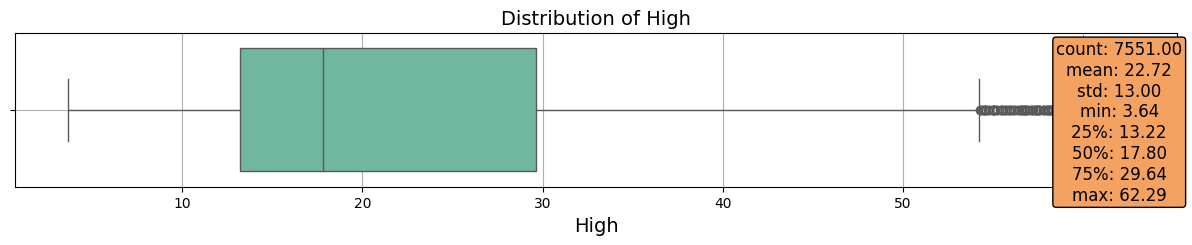

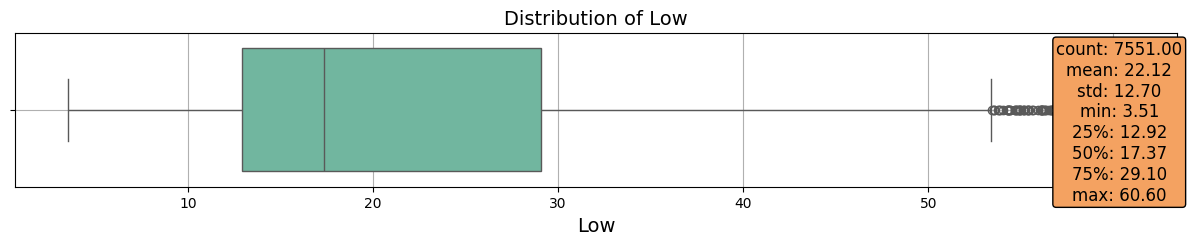

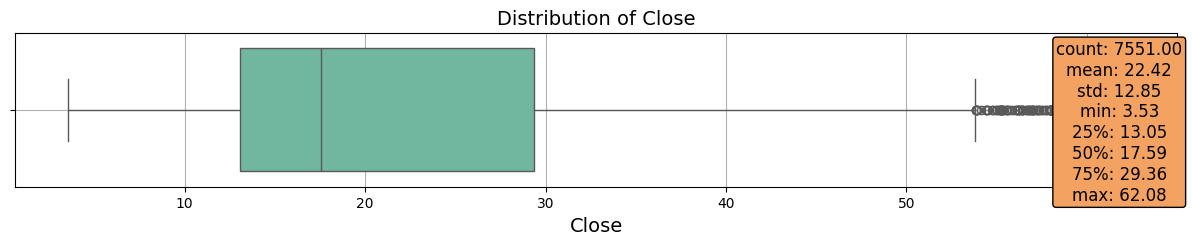

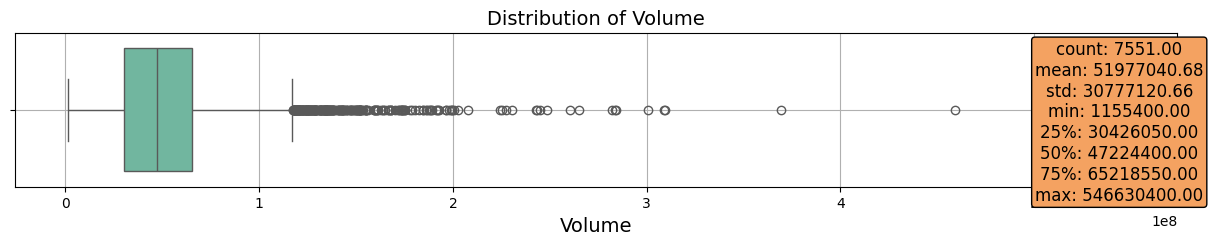

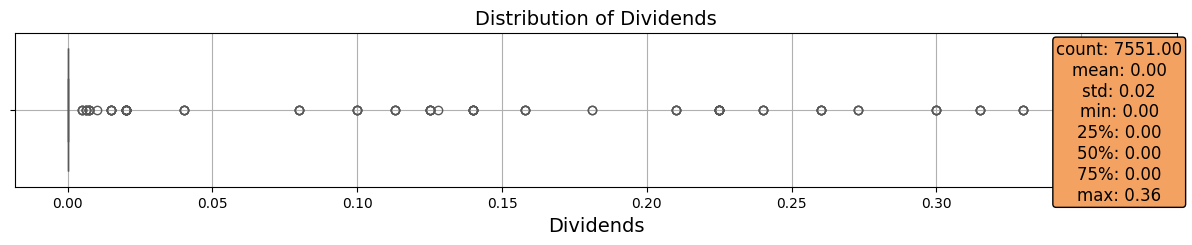

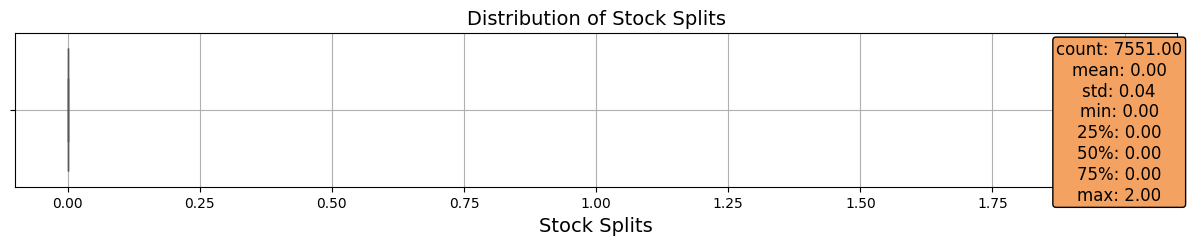

In [16]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f'{key}: {value:.2f}' for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True)
    plt.show()

## Attributes Stock Prices of Intel from 1995 to 2025

<function matplotlib.pyplot.show(close=None, block=None)>

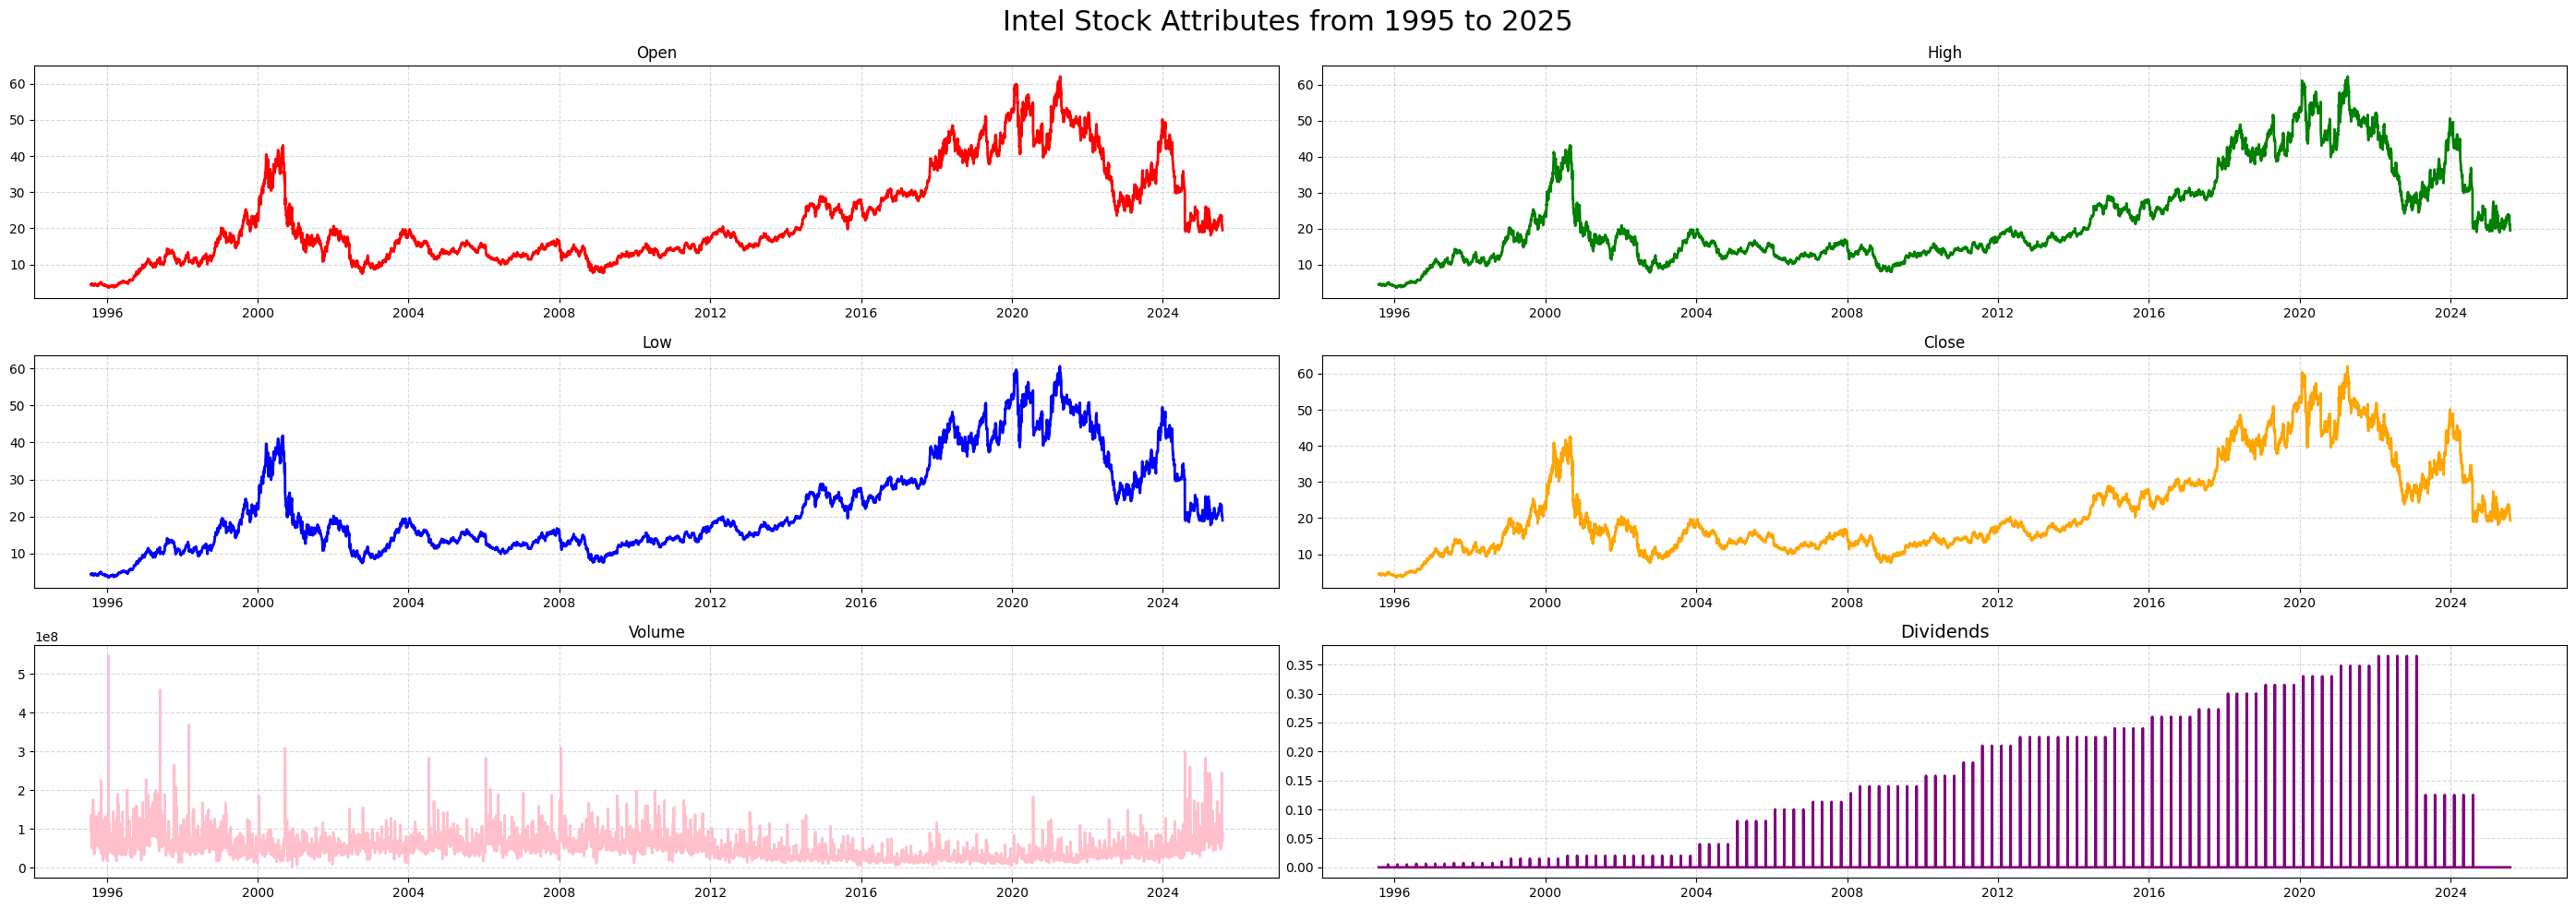

In [17]:
import matplotlib.pyplot as plt
x = df.index
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df["Open"], color = colors[0], linewidth=2)
plt.title('Open')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df["High"], color = colors[1], linewidth=2)
plt.title('High')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df["Low"], color = colors[2], linewidth=2)
plt.title('Low')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df["Close"], color = colors[3], linewidth=2)
plt.title('Close')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df["Volume"], color = colors[4], linewidth=2)
plt.title('Volume')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle("Intel Stock Attributes from 1995 to 2025", fontsize = 22, y=0.98)
plt.tight_layout()
plt.show


## Weekly Component

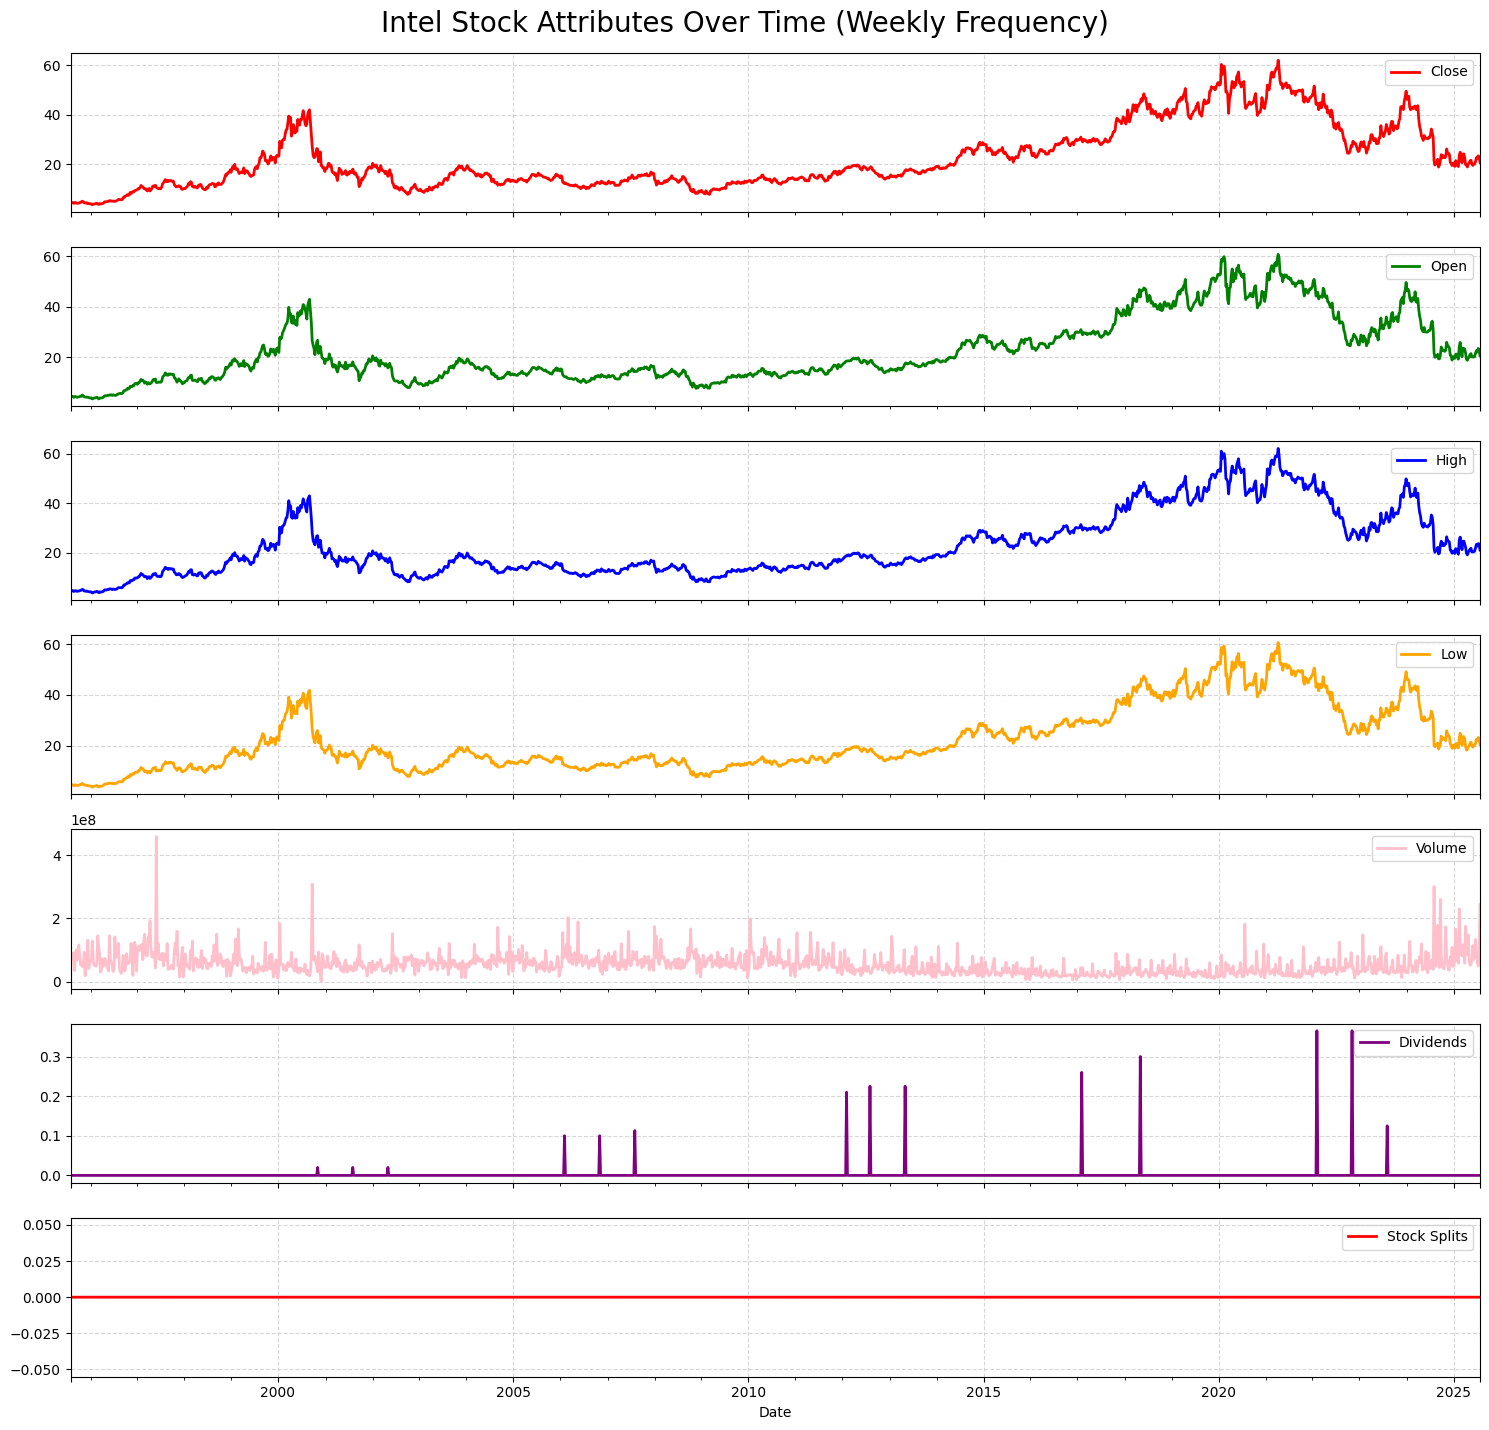

In [18]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']

df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Weekly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()   

## Monthly Component

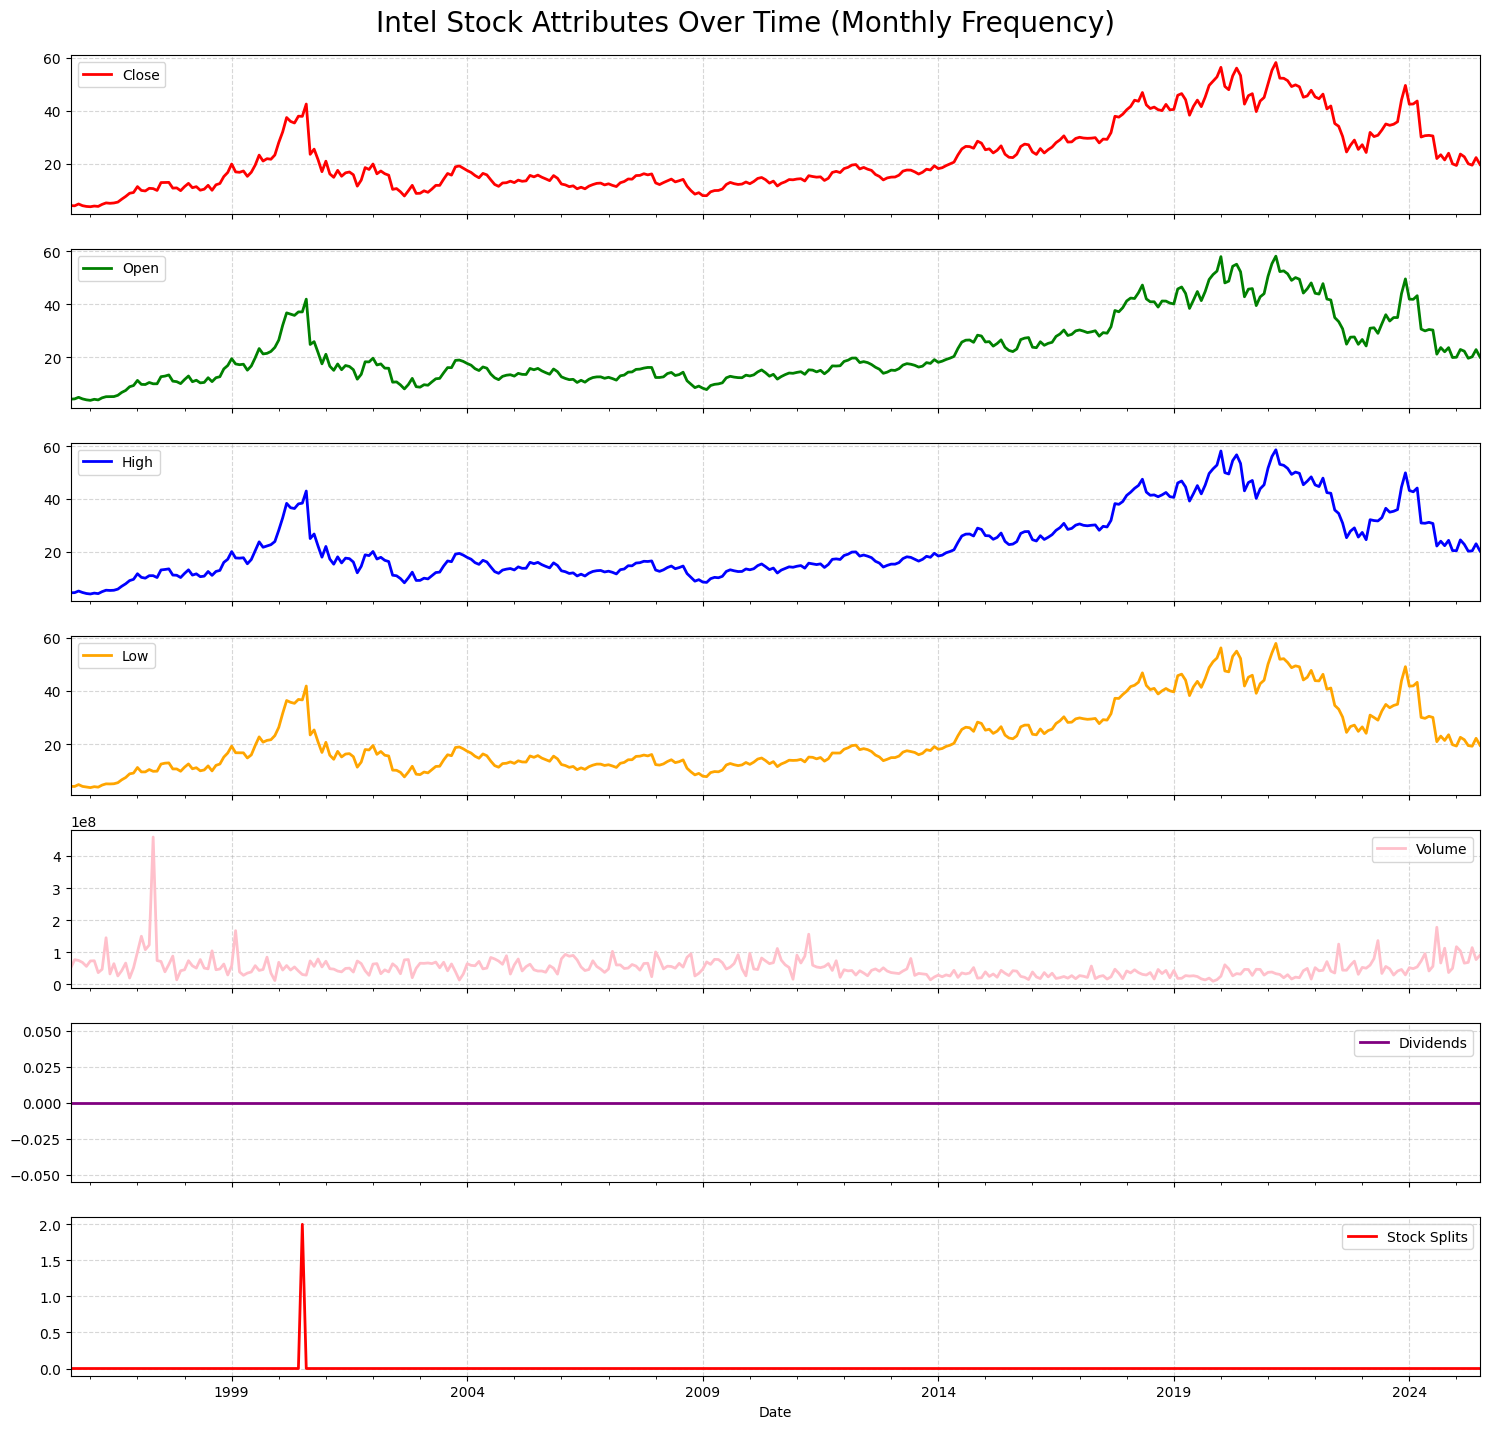

In [19]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
df_monthly = df.asfreq("M", method='ffill')
df_monthly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Monthly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle = '--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Candlestick Chart of Intel

In [20]:
import plotly.graph_objs as go
from datetime import datetime

candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name = "INTC",
    increasing=dict(line=dict(color="#067c0c"), fillcolor='#ccf5e7'),
    decreasing=dict(line=dict(color="#ff2600"), fillcolor='#fde2dd'),
    hovertext=df.index.strftime('%Y-%m-%d'),
    hoverinfo='x+y+name'
)

layout = go.Layout(
    title=dict(
        text='Candlestick Chart of INTC',
        x=0.5,
        font = dict(size=24, color='#264653', family="Arial Black")
    ),
    xaxis=dict(
        title="Date",
        color='#264653',
        showgrid=True,
        gridcolor = 'lightgray',
        rangeslider=dict(visible=False)
    ),
    yaxis=dict(
        title="Price",
        color='#264653',
        showgrid=True,
        gridcolor='lightgray',
        showline=True,
        rangemode='normal',
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(240, 248, 255, 0.95)',
)

fig = go.Figure(data=[candletrace], layout=layout)

fig.show()

## Yearly Mean Prices

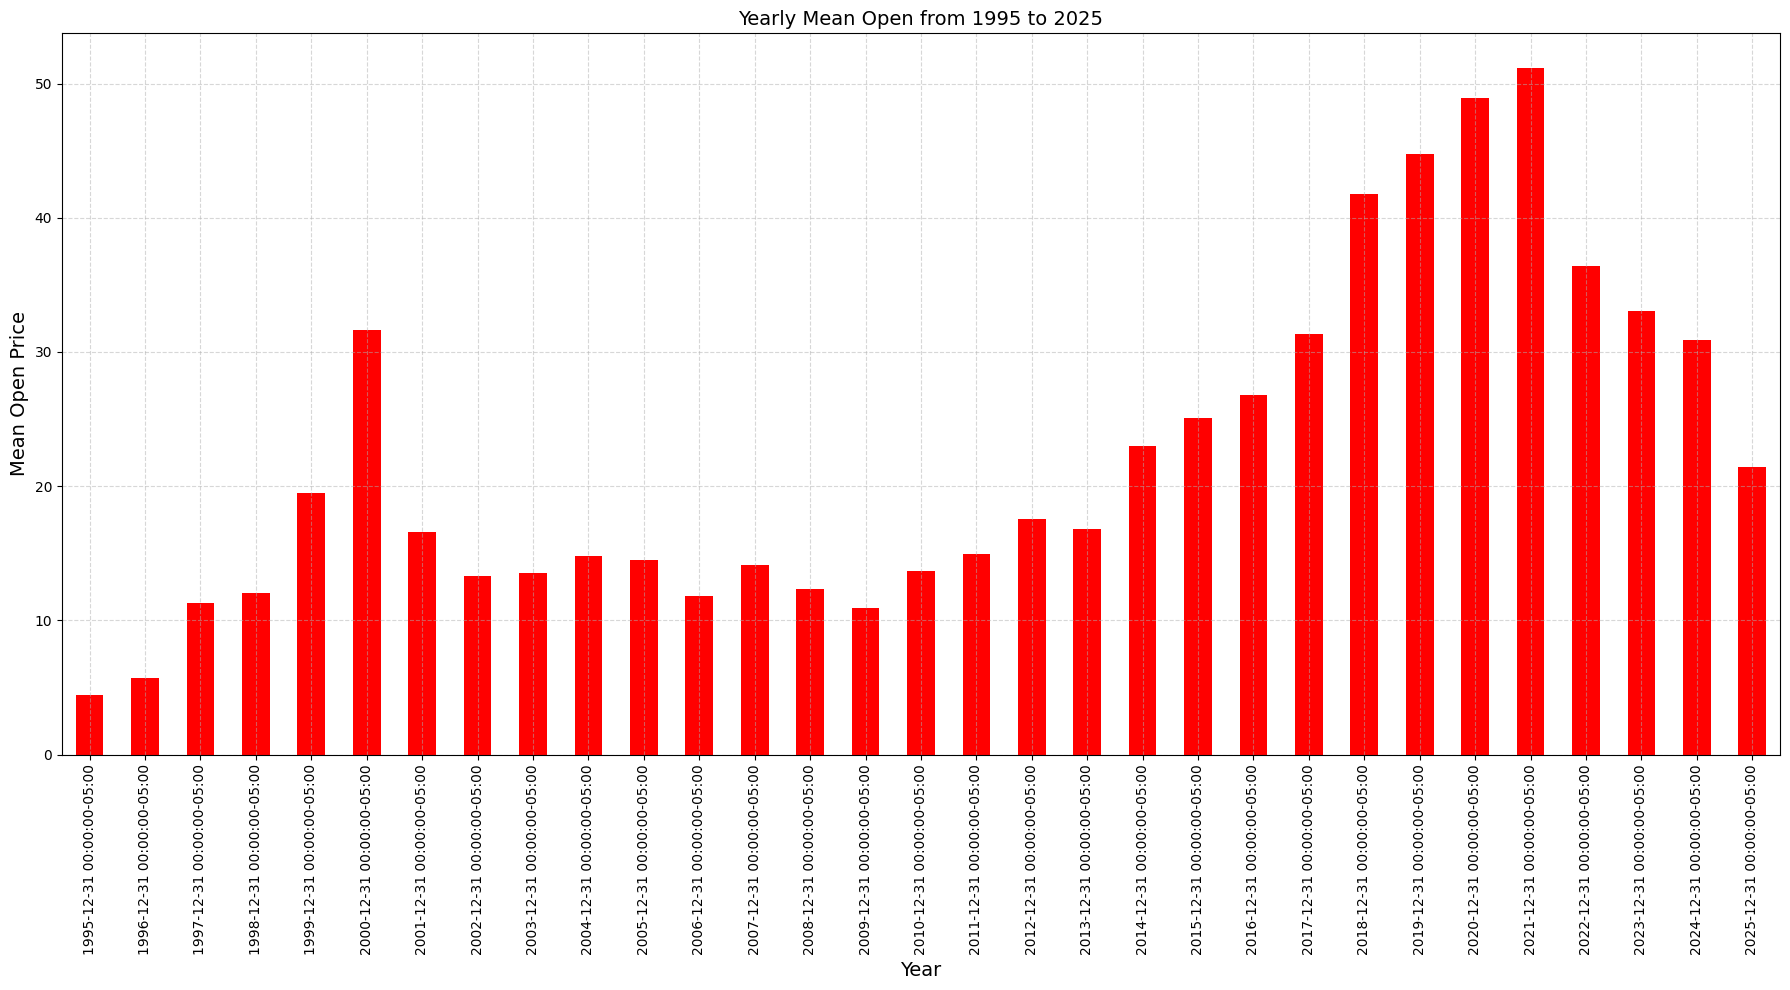

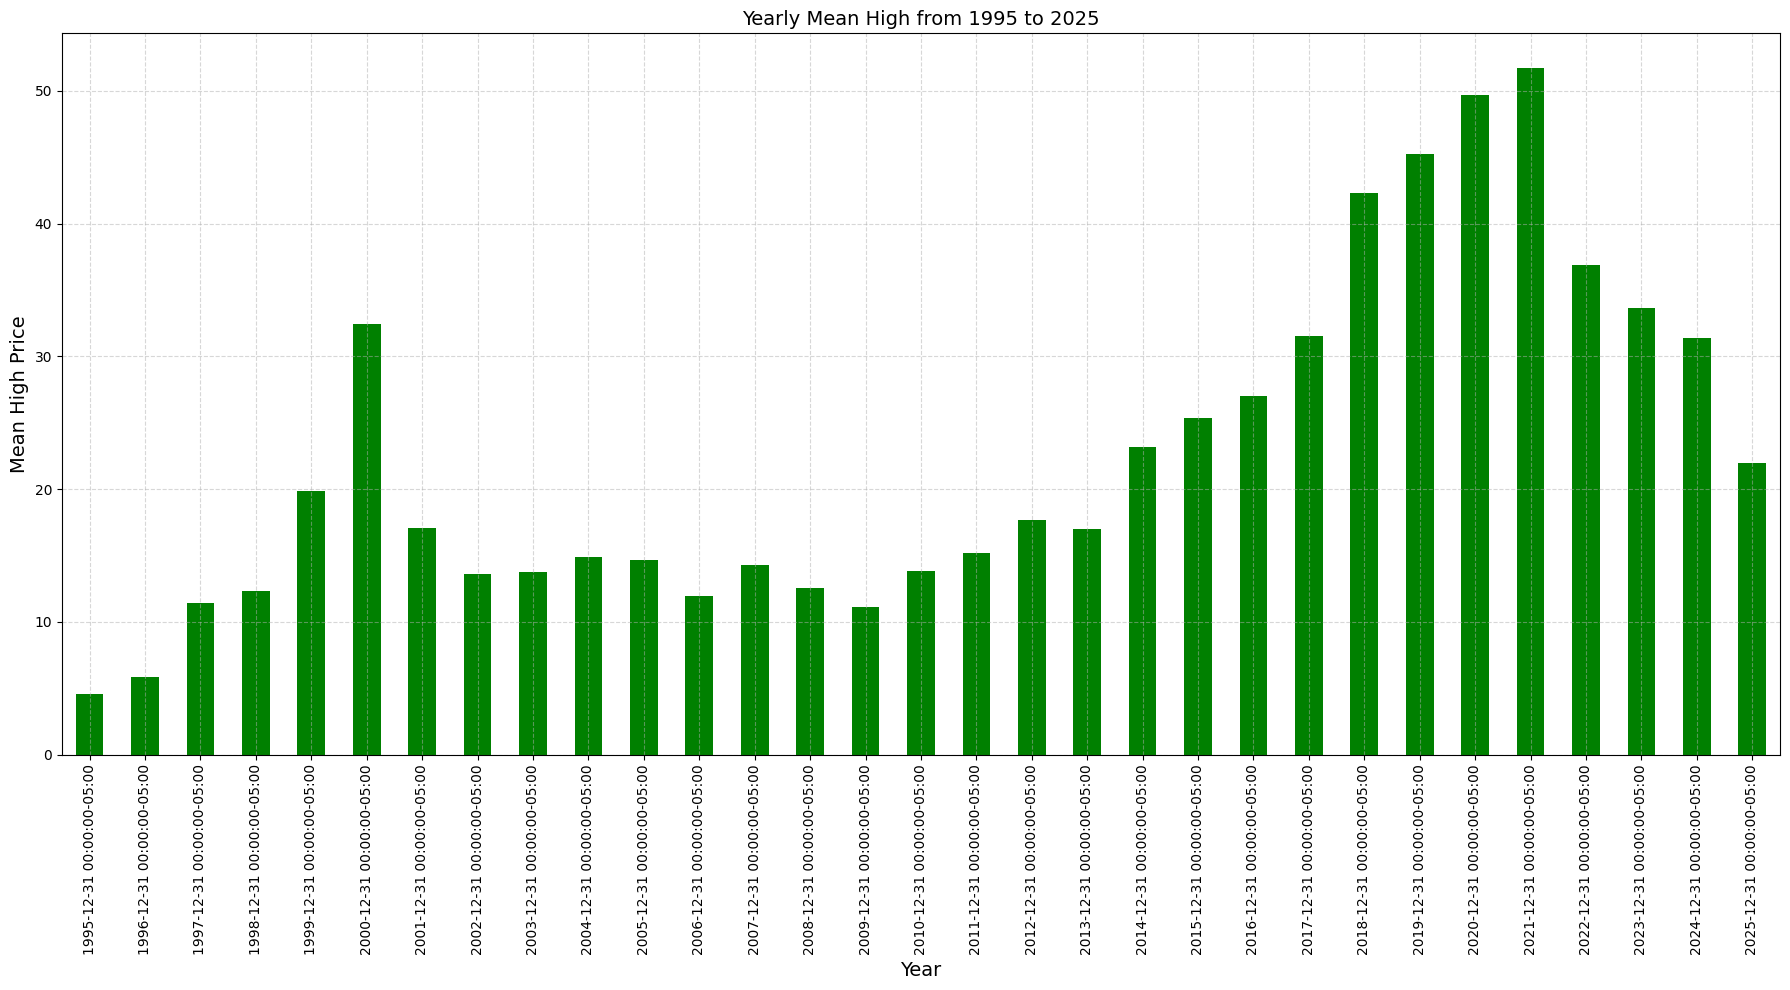

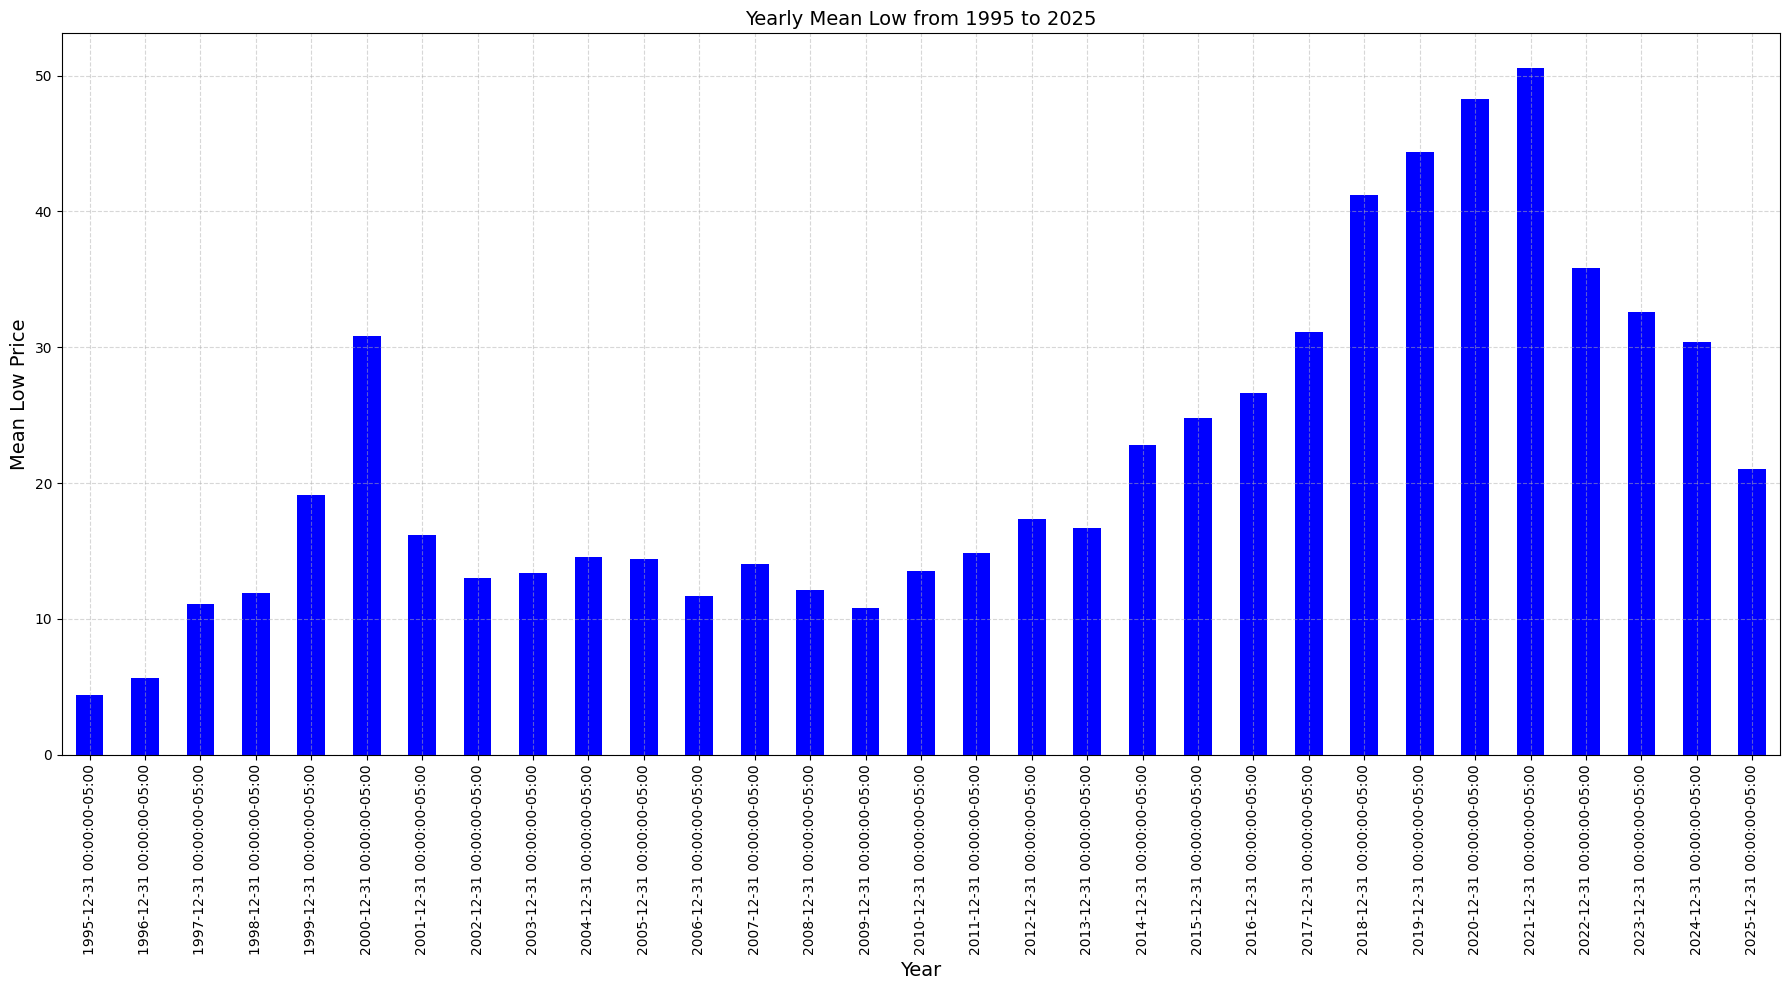

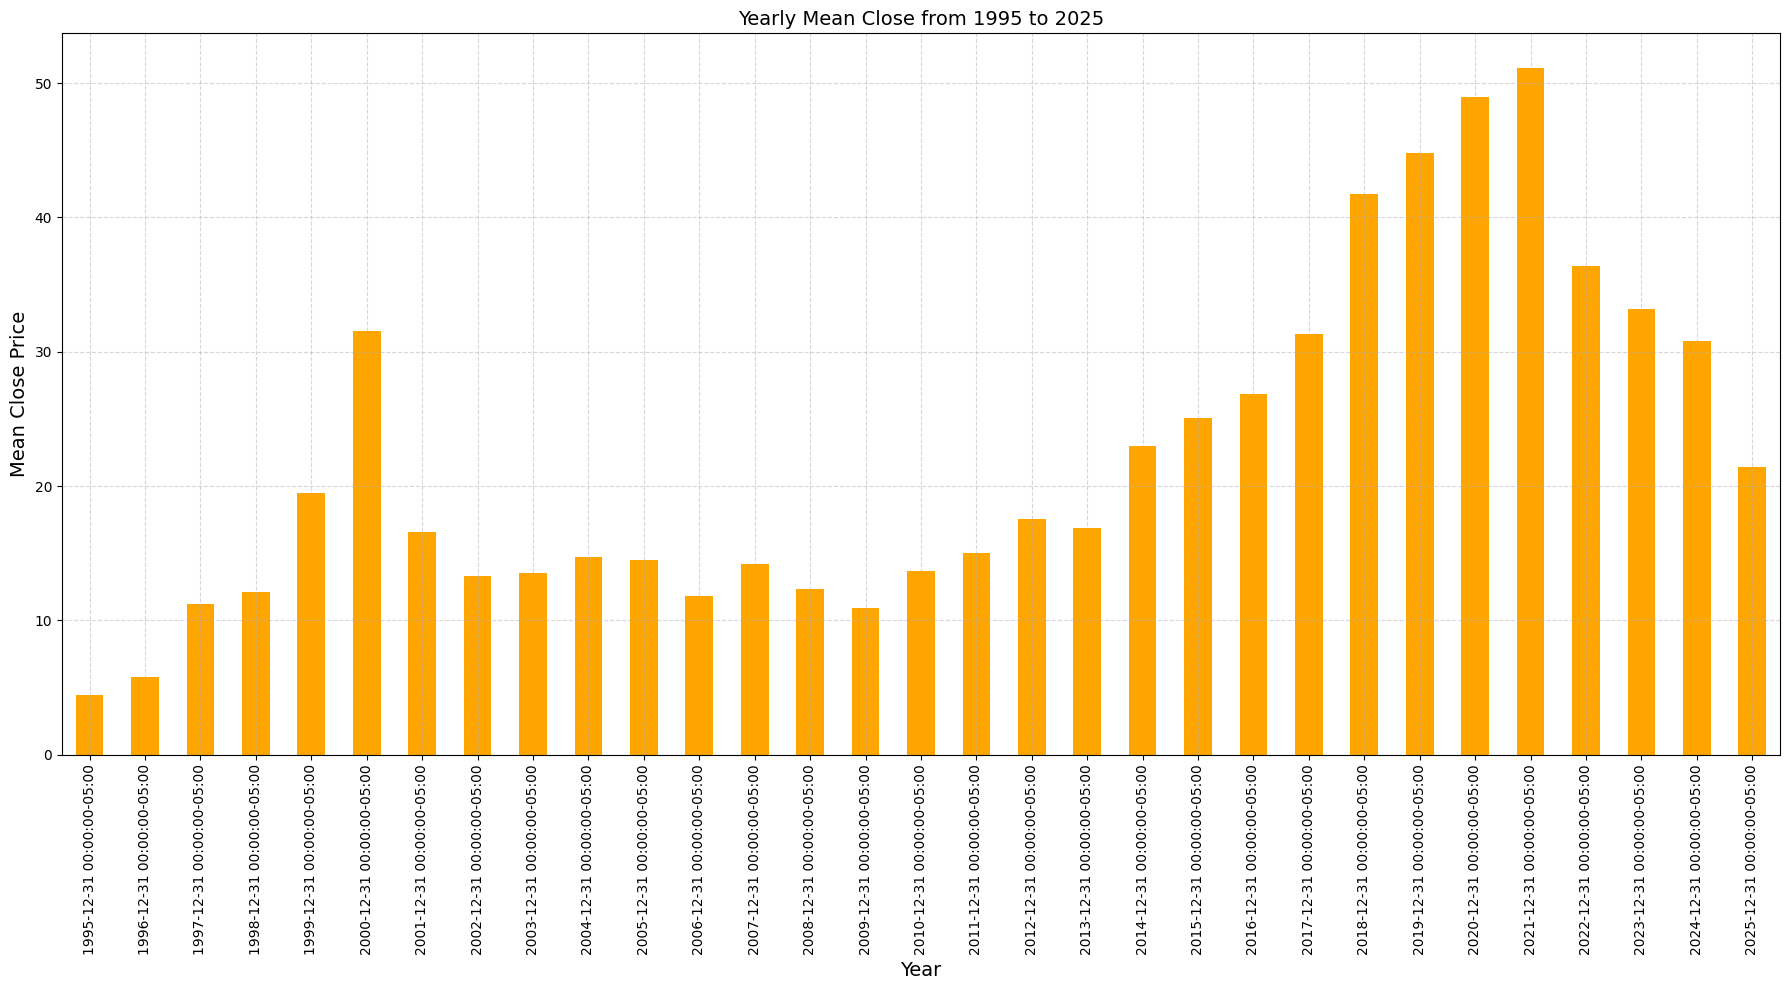

In [24]:
import math
import yfinance as yf
import datetime as dt
colors = ['red', 'green', 'blue', 'orange']
columns = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(columns):
    plt.figure(figsize=(18, 10))
    df[col].resample("A").mean().plot(kind='bar', color=colors[i])

    plt.title(f'Yearly Mean {col} from {df.index.year.min()} to {df.index.year.max()}', fontsize=14)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f'Mean {col} Price', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


